In [1]:
import numpy as np
from bokeh.plotting import figure, output_notebook, show, output_file
import matplotlib.cm as cm
import matplotlib as mpl
from bokeh.plotting import hplot
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, PreviewSaveTool
)
import pandas as pd

In [2]:
import pickle
Data_dir='../../../Data/Weather'
clusters=pickle.load(open(Data_dir+'/stable-clusters.pickle','r'))
stations=pickle.load(open(Data_dir+'/stations_projections.pickle','r'))


In [3]:
cluster1 = set(clusters['3,4,0,4,3,1,2,3,4,4'] + clusters['3,4,0,3,3,1,0,3,4,4'])
cluster2 = set(clusters['2,0,3,4,4,4,2,0,0,3'] + clusters['2,0,3,0,4,4,1,0,0,3'])
cluster3 = set(clusters['0,3,4,0,0,0,1,4,2,0'])

In [4]:
print len(cluster1)
print len(cluster2)
print len(cluster3)

1455
5241
3839


In [5]:
#this code is using pandas dataframes
lons=stations.ix[:,'longitude'].values
lats=stations.ix[:,'latitude'].values
elev=stations.ix[:,'elevation'].values
station_names=stations['station']
ll=len(lons)
lonmin=-180;lonmax=180;latsmin=-80;latsmax=80;
select=(lons>lonmin) * (lons<lonmax)*(lats>latsmin)*(lats<latsmax)
print sum(select)
station_names=station_names[select]
lons=lons[select]
lats=lats[select]
elev=elev[select]
elev=[min(3000,max(e,0))/3000. for e in elev]
print len(lons),len(lats),len(station_names),len(elev)

12140
12140 12140 12140 12140


### Define fields to display in map

In [6]:
colors = []
for stat in station_names:
    color = "gray"
    if stat in cluster1:
        color = "red"
    elif stat in cluster2:
        color = "green"
    elif stat in cluster3:
        color = "blue"
    colors.append(color)
        

### Define output HTML

In [7]:
output_file("plot.html", title="USA Elevation plot", mode="cdn")

In [8]:
from bokeh.models import (
  GMapPlot, GMapOptions, ColumnDataSource, Circle, DataRange1d, PanTool, WheelZoomTool, BoxSelectTool, PreviewSaveTool
)

map_options = GMapOptions(lat=37.09024, lng=-95.712891, map_type="terrain", zoom=4)

plot = GMapPlot(
    x_range=DataRange1d(), y_range=DataRange1d(), map_options=map_options,plot_height = 750,plot_width = 1200)


source = ColumnDataSource(
    data=dict(
        lat=lats,
        lon=lons,
        col=colors
    )
)


circle = Circle(x="lon", y="lat", size=7, fill_color="col", fill_alpha=1, line_color=None,)
plot.add_glyph(source, circle) # Plot for variable 1
plot.add_tools(PanTool(), WheelZoomTool(), BoxSelectTool(), PreviewSaveTool())

# p = hplot(plot,plot2)
show(plot)


### Basemap plot

/Users/saurabh/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


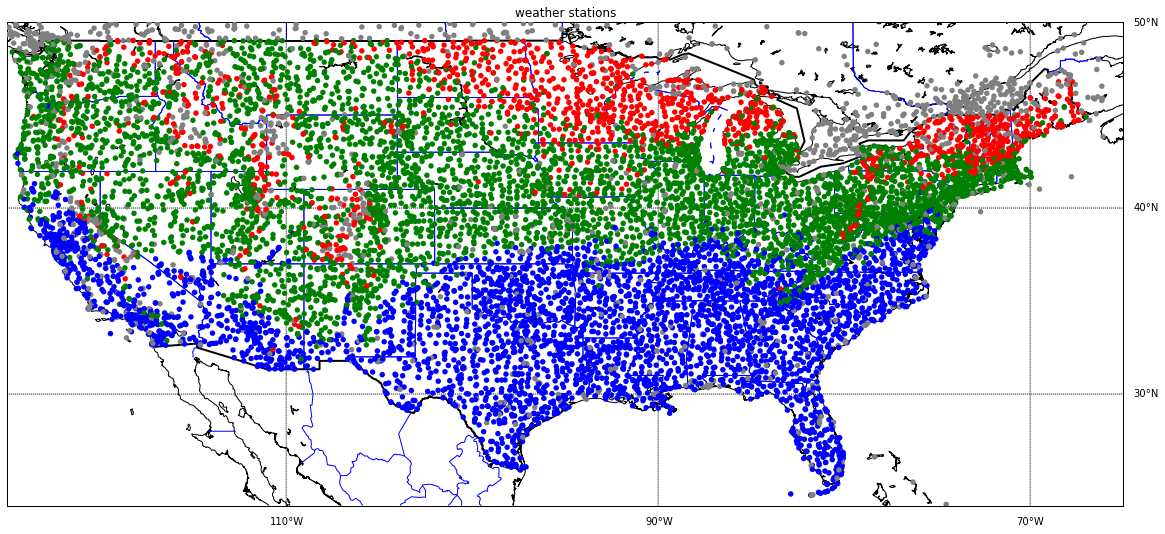

In [9]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from numpy import nan,shape

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# lat_ts is the latitude of true scale.
# resolution = 'i' means use intermediate resolution coastlines.
plt.figure(figsize=(20,20),dpi=300)
m = Basemap(llcrnrlat=24,urcrnrlat=50,\
            llcrnrlon=-125,urcrnrlon=-65,lat_ts=20,resolution='i')
m.drawcoastlines()
# m.fillcontinents(color='coral',lake_color='aqua')
m.drawcountries(linewidth=2)
m.drawstates(linewidth=1,color='blue')
#m.drawrivers()



# draw parallels and meridians.
parallels = np.arange(-80,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])

#m.drawparallels(np.arange(-90.,91.,30.))
#m.drawmeridians(np.arange(-180.,181.,60.))
# m.drawmapboundary(fill_color='aqua')
# draw map with markers for locations
x, y = m(lons,lats)
m.scatter(x,y,30,c = colors,marker='o',edgecolors='none',zorder=10) 
#m.plot(x,y,'.g')
plt.title('weather stations')
plt.show()
